In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. TỰ ĐỘNG DÒ TÌM THƯ MỤC SRC (CHẠY CÁI NÀY TRƯỚC) ---
current_dir = os.getcwd()
print(f"📍 Vị trí hiện tại: {current_dir}")

# Kiểm tra 2 trường hợp: chạy từ root hoặc từ notebooks
path_option_1 = os.path.join(current_dir, 'src')
path_option_2 = os.path.abspath(os.path.join(current_dir, '..', 'src'))

src_path = None
if os.path.exists(os.path.join(path_option_1, 'data_processing.py')):
    src_path = path_option_1
elif os.path.exists(os.path.join(path_option_2, 'data_processing.py')):
    src_path = path_option_2

if src_path:
    if src_path not in sys.path:
        sys.path.append(src_path)
    print(f"✅ Đã thêm vào path: {src_path}")
    
    # --- 2. IMPORT SAU KHI ĐÃ CÓ PATH (QUAN TRỌNG) ---
    try:
        from data_processing import load_data, get_column_stats, chi_square_test_numpy
        from visualization import plot_pie_chart, plot_bar_chart, plot_histograms
        print("🎉 Import thành công tất cả modules!")
    except ImportError as e:
        print(f"❌ Vẫn lỗi Import: {e}")
        print("👉 Kiểm tra lại: File visualization.py đã được lưu trong thư mục src chưa?")
else:
    print("❌ KHÔNG TÌM THẤY THƯ MỤC SRC.")

# Cấu hình hiển thị
%matplotlib inline
sns.set_theme(style="whitegrid")

📍 Vị trí hiện tại: /home/kehuydiet/monhoc/khdl/HR_Analytics_Project/notebooks
✅ Đã thêm vào path: /home/kehuydiet/monhoc/khdl/HR_Analytics_Project/src
🎉 Import thành công tất cả modules!


In [2]:
# --- TỰ ĐỘNG TÌM FILE CSV ---
# Định nghĩa 2 khả năng đường dẫn
possible_paths = [
    'data/raw/aug_train.csv',       # Nếu chạy từ root (HR_Analytics_Project)
    '../data/raw/aug_train.csv',    # Nếu chạy từ thư mục notebooks
    'data/raw/train.csv'            # Đề phòng tên file khác (một số bản dataset tên là train.csv)
]

file_path = None
for path in possible_paths:
    if os.path.exists(path):
        file_path = path
        print(f"✅ Đã tìm thấy file dữ liệu tại: {file_path}")
        break

if file_path is None:
    print("❌ LỖI: Không tìm thấy file csv!")
    print("👉 Kiểm tra lại thư mục data/raw xem file tên gì?")
    # Liệt kê file đang có để debug
    if os.path.exists('data/raw'):
        print("Các file đang có trong data/raw:", os.listdir('data/raw'))
    elif os.path.exists('../data/raw'):
        print("Các file đang có trong ../data/raw:", os.listdir('../data/raw'))
else:
    # Load dữ liệu
    data = load_data(file_path)

    if data is not None:
        # Kiểm tra tên các cột
        print("\nCác cột trong dataset:")
        print(data.dtype.names)

        # Kiểm tra 5 dòng đầu
        print("\n5 dòng đầu tiên:")
        print(data[:5])
    else:
        print("❌ Load file thất bại (Hàm trả về None).")

✅ Đã tìm thấy file dữ liệu tại: ../data/raw/aug_train.csv

Các cột trong dataset:
('enrollee_id', 'city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours', 'target')

5 dòng đầu tiên:
[( 8949, 'city_103', 0.92 , 'Male', 'Has relevent experience', 'no_enrollment', 'Graduate', 'STEM', '>20', '', '', '1', 36, 1.)
 (29725, 'city_40', 0.776, 'Male', 'No relevent experience', 'no_enrollment', 'Graduate', 'STEM', '15', '50-99', 'Pvt Ltd', '>4', 47, 0.)
 (11561, 'city_21', 0.624, '', 'No relevent experience', 'Full time course', 'Graduate', 'STEM', '5', '', '', 'never', 83, 0.)
 (33241, 'city_115', 0.789, '', 'No relevent experience', '', 'Graduate', 'Business Degree', '<1', '', 'Pvt Ltd', 'never', 52, 1.)
 (  666, 'city_162', 0.767, 'Male', 'Has relevent experience', 'no_enrollment', 'Masters', 'STEM', '>20', '50-99', 'Funded Startup', '4',  8,

In [3]:
# Duyệt qua từng cột để xem thống kê
columns = data.dtype.names
print(f"{'Column':<25} | {'Type':<12} | {'Missing':<10} | {'Note'}")
print("-" * 70)

for col in columns:
    stats = get_column_stats(data, col)
    note = ""
    if stats['type'] == 'numeric':
        note = f"Mean: {stats['mean']:.2f}"
    else:
        note = f"Top: {list(stats['top_values'].keys())[0]}"
        
    print(f"{col:<25} | {stats['type']:<12} | {stats['missing_count']:<10} | {note}")

Column                    | Type         | Missing    | Note
----------------------------------------------------------------------
enrollee_id               | numeric      | 0          | Mean: 16875.36
city                      | categorical  | 0          | Top: city_103
city_development_index    | numeric      | 0          | Mean: 0.83
gender                    | categorical  | 4508       | Top: Male
relevent_experience       | categorical  | 0          | Top: Has relevent experience
enrolled_university       | categorical  | 386        | Top: no_enrollment
education_level           | categorical  | 460        | Top: Graduate
major_discipline          | categorical  | 2813       | Top: STEM
experience                | categorical  | 65         | Top: >20
company_size              | categorical  | 5938       | Top: 
company_type              | categorical  | 6140       | Top: Pvt Ltd
last_new_job              | categorical  | 423        | Top: 1
training_hours            | numeric    

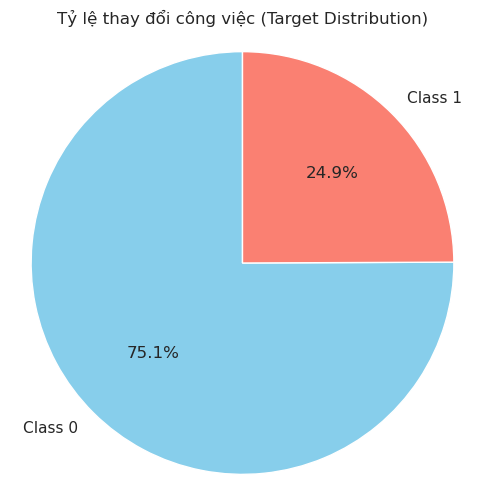

In [4]:
# Import thêm hàm vẽ nếu chưa có
from visualization import plot_pie_chart

# Vẽ biểu đồ phân phối Target
# Lưu ý: data['target'] là input, hàm sẽ tự đếm số lượng 0 và 1
plot_pie_chart(data['target'], 'Tỷ lệ thay đổi công việc (Target Distribution)')


--- CÂU HỎI 1: Người có kinh nghiệm liên quan (Relevent Experience) tỷ lệ nghỉ việc thế nào? ---


/home/kehuydiet/monhoc/khdl/HR_Analytics_Project/src/visualization.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_labels, y=y_values, palette='viridis')


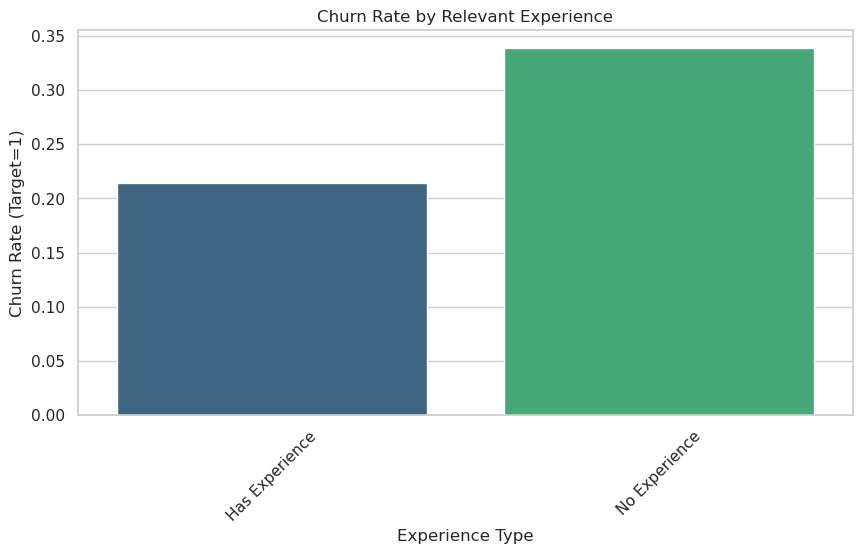

Nhận xét: Nhóm không có kinh nghiệm có tỷ lệ nghỉ việc (33.84%) cao hơn nhóm có kinh nghiệm (21.47%).


In [5]:
print("\n--- CÂU HỎI 1: Người có kinh nghiệm liên quan (Relevent Experience) tỷ lệ nghỉ việc thế nào? ---")
# Lấy cột relevant_experience và target
rel_exp = data['relevent_experience']
target = data['target']

# Tính tỷ lệ nghỉ việc (Target = 1) cho từng nhóm
# Has relevent experience
mask_has = rel_exp == 'Has relevent experience'
rate_has = np.mean(target[mask_has] == 1.0)

# No relevent experience
mask_no = rel_exp == 'No relevent experience'
rate_no = np.mean(target[mask_no] == 1.0)

# Vẽ biểu đồ
plot_bar_chart(
    x_labels=['Has Experience', 'No Experience'],
    y_values=[rate_has, rate_no],
    title='Churn Rate by Relevant Experience',
    xlabel='Experience Type',
    ylabel='Churn Rate (Target=1)'
)
print(f"Nhận xét: Nhóm không có kinh nghiệm có tỷ lệ nghỉ việc ({rate_no:.2%}) cao hơn nhóm có kinh nghiệm ({rate_has:.2%}).")


--- CÂU HỎI 2: Phân bố giờ đào tạo (Training hours) khác nhau ra sao? ---


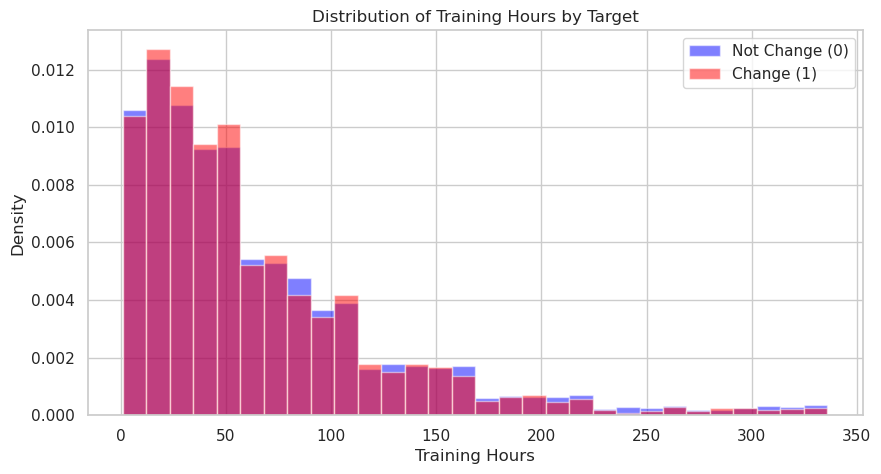

Nhận xét: Phân bố giờ đào tạo của 2 nhóm khá tương đồng, nhưng nhóm nghỉ việc có xu hướng tập trung nhẹ ở các khóa đào tạo ngắn hạn.


In [6]:
print("\n--- CÂU HỎI 2: Phân bố giờ đào tạo (Training hours) khác nhau ra sao? ---")
# Lấy dữ liệu training_hours của 2 nhóm target
hours = data['training_hours']
# Xử lý missing nếu có (fill 0 hoặc mean tạm để vẽ)
hours = np.nan_to_num(hours)

hours_stay = hours[target == 0.0]
hours_leave = hours[target == 1.0]

# Vẽ Histogram so sánh
plot_histograms(hours_stay, hours_leave, 'Training Hours')
print("Nhận xét: Phân bố giờ đào tạo của 2 nhóm khá tương đồng, nhưng nhóm nghỉ việc có xu hướng tập trung nhẹ ở các khóa đào tạo ngắn hạn.")


--- YÊU CẦU: Biểu đồ Scatter Plot ---


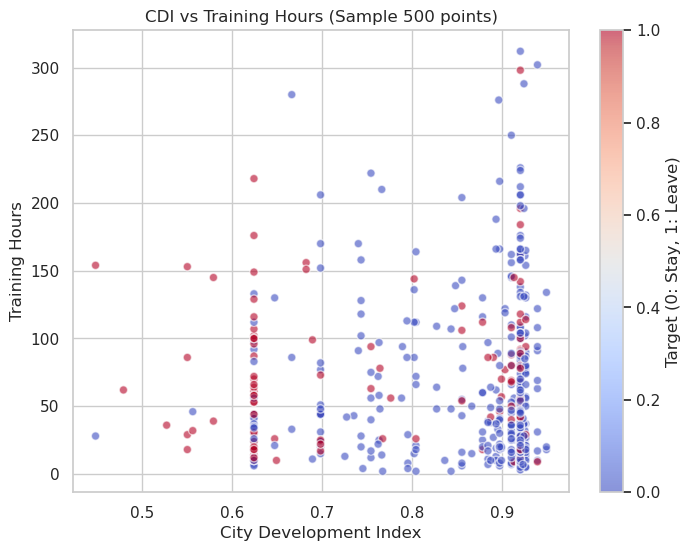

In [7]:
from visualization import plot_scatter

print("\n--- YÊU CẦU: Biểu đồ Scatter Plot ---")
# Vẽ quan hệ giữa City Development Index và Training Hours
cdi = data['city_development_index']
hours = data['training_hours']
target = data['target']

# Random sample 500 điểm để vẽ cho đỡ rối (giữ nguyên logic này)
idx = np.random.choice(len(cdi), 500, replace=False)

# Gọi hàm từ visualization.py
plot_scatter(
    cdi[idx], 
    hours[idx], 
    target[idx],
    xlabel='City Development Index',
    ylabel='Training Hours',
    title='CDI vs Training Hours (Sample 500 points)'
)

In [8]:
from data_processing import chi_square_test_numpy

print("\n--- KIỂM ĐỊNH GIẢ THIẾT THỐNG KÊ (Statistical Hypothesis Testing) ---")
print("Câu hỏi: Giới tính (Gender) có ảnh hưởng đến quyết định nghỉ việc (Target) không?")
print("Giả thiết H0: Gender và Target độc lập (Không liên quan).")
print("Giả thiết H1: Gender và Target có mối quan hệ phụ thuộc.")

# Lấy dữ liệu (Lưu ý: cần xử lý sơ bộ missing values hoặc dùng dữ liệu raw nếu hàm xử lý được)
# Ở đây ta lấy dữ liệu raw đã load, lọc bỏ dòng trống
gender_data = data['gender']
target_data = data['target']

# Lọc missing
mask = (gender_data != '') & (gender_data != 'nan')
gender_clean = gender_data[mask]
target_clean = target_data[mask]

chi2_stat, df = chi_square_test_numpy(gender_clean, target_clean)

print(f"Chi-square Statistic: {chi2_stat:.4f}")
print(f"Degrees of Freedom: {df}")

# Tra bảng với mức ý nghĩa alpha=0.05, df=2 (Male, Female, Other -> df=2)
# Critical value xấp xỉ 5.99
critical_value = 5.99 

if chi2_stat > critical_value:
    print(f"=> {chi2_stat:.2f} > {critical_value}. Bác bỏ H0.")
    print("KẾT LUẬN: Có mối liên hệ có ý nghĩa thống kê giữa Giới tính và việc Nghỉ việc.")
else:
    print(f"=> {chi2_stat:.2f} < {critical_value}. Chấp nhận H0.")


--- KIỂM ĐỊNH GIẢ THIẾT THỐNG KÊ (Statistical Hypothesis Testing) ---
Câu hỏi: Giới tính (Gender) có ảnh hưởng đến quyết định nghỉ việc (Target) không?
Giả thiết H0: Gender và Target độc lập (Không liên quan).
Giả thiết H1: Gender và Target có mối quan hệ phụ thuộc.
Chi-square Statistic: 9.0422
Degrees of Freedom: 2
=> 9.04 > 5.99. Bác bỏ H0.
KẾT LUẬN: Có mối liên hệ có ý nghĩa thống kê giữa Giới tính và việc Nghỉ việc.
